In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.interpolate import UnivariateSpline
data=pd.read_pickle('AQI-FE1-Binarized.pkl')
dx=data[[ 'Month', 'Quarter', 'Dayofweek', 'HourofDay',
       'DayofMonth', 'Dayoftheyear', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday','AH']].copy(deep=True)
dx.sort_index(inplace=True)

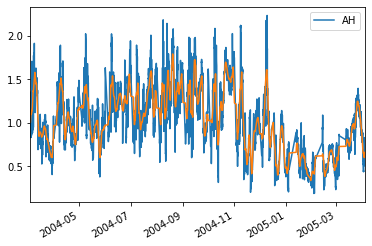

In [2]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx1=dx['AH'].rolling(window=72, center=True, min_periods=24).mean()
dx.plot(y='AH',ax=ax)
dx1.plot(y='AH', ax=ax)

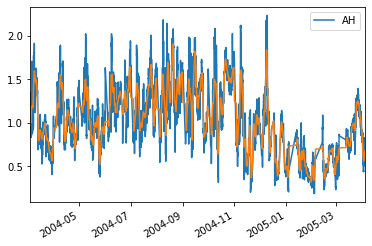

In [3]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx2=dx['AH'].rolling(window=48, center=True, min_periods=24).mean()
dx.plot(y='AH',ax=ax)
dx2.plot(y='AH', ax=ax)

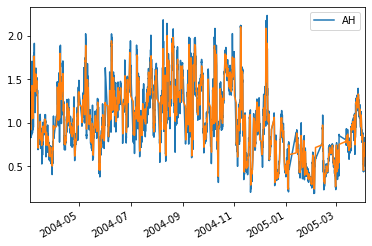

In [20]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx3=dx['AH'].rolling(window=12, center=True, min_periods=12).mean()
dx.plot(y='AH',ax=ax)
dx3.plot(y='AH', ax=ax)

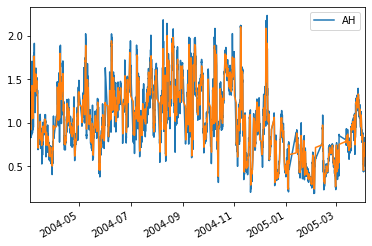

In [5]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx4=dx['AH'].rolling(window=12, center=True, min_periods=12).mean()
dx.plot(y='AH',ax=ax)
dx4.plot(y='AH', ax=ax)

In [6]:
dx['rolling-72']=dx['AH'].rolling(window=72, center=True, min_periods=6).mean()
dx['rolling-48']=dx['AH'].rolling(window=48, center=True, min_periods=6).mean()
dx['rolling-24']=dx['AH'].rolling(window=24, center=True, min_periods=6).mean()
dx['rolling-12']=dx['AH'].rolling(window=12, center=True, min_periods=6).mean()

In [7]:
train=dx.loc[:'2005-3-1'].copy(deep=True)
test=dx.loc['2005-3-2':].copy(deep=True)

In [8]:
attb=['rolling-72','rolling-48','rolling-24','rolling-12']
RM = lm.LinearRegression()
RM.fit(train[attb],train['AH'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
pred = RM.predict(test[attb])
pred=pd.DataFrame(pred,columns=['Prediction'])
pred.index=test.index
test1=pd.concat([test,pred],axis=1)

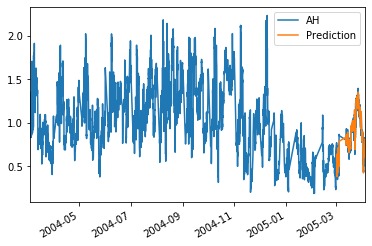

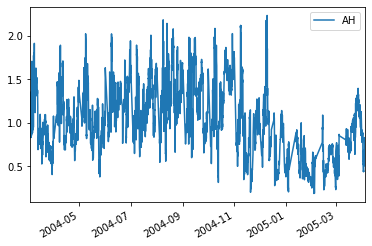

In [10]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx.plot(y='AH',ax=ax)
test1.plot(y='Prediction',ax=ax)
dx.plot(y='AH')

In [21]:
mean_squared_error(test1['AH'], test1['Prediction'])

0.002762379988864811

In [22]:
r2_score(test1['AH'], test1['Prediction'])

0.9480552903088173

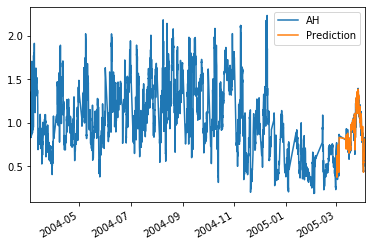

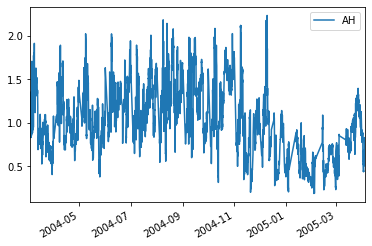

In [13]:
reg2 = RandomForestRegressor(random_state=1, n_estimators=100,max_depth=30,min_samples_leaf=3,min_samples_split=5)
reg2.fit(train[attb],train['AH'])
pred = reg2.predict(test[attb])
pred=pd.DataFrame(pred,columns=['Prediction'])
pred.index=test.index
test1=pd.concat([test,pred],axis=1)
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx.plot(y='AH',ax=ax)
test1.plot(y='Prediction',ax=ax)
dx.plot(y='AH')

In [14]:
mean_squared_error(test1['AH'], test1['Prediction'])


0.002762379988864811

In [15]:
r2_score(test1['AH'], test1['Prediction'])

0.9480552903088173